<a href="https://colab.research.google.com/github/priyaregit/Rossmann-Sales-Prediction_Regression_Capstone-Project/blob/main/Rossmann_Sales_Prediction_Capstone_Project_2_Supriya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

# Importing datetime module 
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from xgboost import XGBRegressor

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Reading both the data sets from Google drive and storing it as dataframes: store and store2
store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/Rossmann Stores Data.csv')
store2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/store.csv')

# Setting the option to display upto 50 columns of the dataframe
pd.set_option ("display.max_columns", 50)

<b> Data Inspection

Let us perform some basic checks on the data set such as:
*   Checking the shape (i.e. number of rows and columns) of the dataframes 
*   Checking for the various variables/features of each dataframe
*   Checking the data type of each of the features
*   Checking for the missing/null values

These checks would give us a baseline understanding of the available data.

In [ ]:
# Checking the shape of store and store2
store.shape , store2.shape

((1017209, 9), (1115, 10))

In [ ]:
# Checking the head (first 5 rows) of store
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Checking the tail of store
store.tail(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


We have data of 1115 stores from 2013-01-01 to 2015-07-31.

In [ ]:
# Checking for statistics of the numeric columns in store
store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


We can see that the maximum number of sales is 41551 while the mean sales is 5773. The maximum number of customers is 7388

In [ ]:
# Checking the head of store2
store2.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
# Checking the tail of store2
store2.tail(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
store2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


The mean distance of a competitor is 5405 m while the farthest competitor is at a distance of 75860 m. 

The oldest competitor is open since 1900.

Promo2 has been running since 2009.

We can merge both the data sets since they have common feature of 'Store'

In [46]:
# Merging dataframe store2 with the dataframe store, based on the column 'Store' and through an outer join 

store = store.merge(store2, on ='Store', how = 'outer')

In [47]:
# Checking for the shape of the new dataframe formed after merger
store.shape

(1017209, 18)

In the merged dataframe , there are now 1,017,209 observations with 18 features.

In [ ]:
# Having a look at the first 5 rows/observations from the new dataframe
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Checking the last 5 rows
store.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


<b> Handling missing/null values

In [ ]:
# Checking for information such as missing values and data type of all the columns
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

There are 6 columns with missing\null values. 

The null values in the columns: 'CompetitionDistance', 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' can be handled in multiple ways:

We can do mean or median imputation. Alternatively, we can also impute the maximum value of competition distance or simply assign 0, meaning there is no competition. We will not go with the latter option because generally, stores do have competition in their vicinity.

We will also not do mean imputation because the presence of outliers affects the mean.

I will therefore, be filling all the null values in these three columns with their respective median values.


In [48]:
# Filling the null values in 'CompetitionDistance', 'CompetitionOpenSinceMonth and 'CompetitionOpenSinceYear' with the respective median value
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace = True)
store.CompetitionOpenSinceMonth.fillna(store.CompetitionOpenSinceMonth.median(), inplace = True)
store.CompetitionOpenSinceYear.fillna(store.CompetitionOpenSinceYear.median(), inplace = True)

In [ ]:
# Checking for value count of 'Promo2'
store['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

The count of observations from stores participating in Promo2 is the same as the number of non-null observations in the columns- 'Promo2SinceWeek',	'Promo2SinceYear' and	'PromoInterval'. This implies that the rest of the observations (i.e. null observations) in the three columns, belong to those stores which are not running Promo2. Hence, i will fill all such null observations in these columns with 0.

In [49]:
# Filling the null values in 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' with 0
store.Promo2SinceWeek.fillna(0, inplace = True)
store.Promo2SinceYear.fillna(0, inplace = True)
store.PromoInterval.fillna('0', inplace = True)

Having handled the missing values,let us check for outliers.

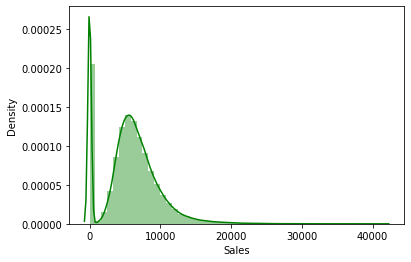

In [7]:
sns.distplot(store['Sales'], color = 'g')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

The above plot is highly skewed, implying there may be outliers.

In [ ]:
# Checking for the mean, median and maximum value of 'Sales'
store['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

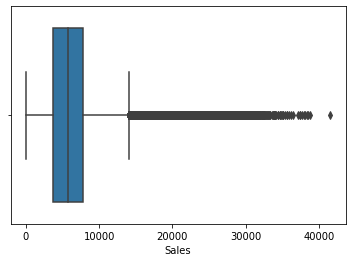

In [ ]:
sns.boxplot(store['Sales'])

In [ ]:
store['Sales'].quantile(0.99)

17160.0

In [ ]:
store [store['Sales']> 25000].shape

(758, 18)

We see that the maximum value of Sales is 41,551 while the average sales is 5,773. It would be better to remove the extreme outliers. Here, i would remove all those observations with sales value greater than 25,000.

In [50]:
# Keeping only those observations with Sales < 25000

store = store [ store['Sales'] < 25000 ]

In [ ]:
store.shape

(1016450, 18)

In [ ]:
store [ (store['Open'] == 1) & (store['Sales'] == 0)].shape

(54, 18)

I will also remove all those observations where the store is open but sales is 0 as it could be a case of wrong entry of data 

In [51]:
store.drop(store [(store['Open'] == 1) & (store['Sales'] == 0)].index, inplace = True)


In [10]:
store.shape

(1016396, 18)

In [ ]:
# Checking the data type of all the columns
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016396 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1016396 non-null  int64  
 1   DayOfWeek                  1016396 non-null  int64  
 2   Date                       1016396 non-null  object 
 3   Sales                      1016396 non-null  int64  
 4   Customers                  1016396 non-null  int64  
 5   Open                       1016396 non-null  int64  
 6   Promo                      1016396 non-null  int64  
 7   StateHoliday               1016396 non-null  object 
 8   SchoolHoliday              1016396 non-null  int64  
 9   StoreType                  1016396 non-null  object 
 10  Assortment                 1016396 non-null  object 
 11  CompetitionDistance        1016396 non-null  float64
 12  CompetitionOpenSinceMonth  1016396 non-null  float64
 13  CompetitionO

Having handled the null values, we now have to convert the data type of a few features in order to build a sales prediction model.

I will first convert the 'Date' column from 'object' data type to date-time format

In [52]:
# Converting data type of the column 'Date' from object to datetime
store['Date'] =  pd.to_datetime(store['Date'], format="%Y-%m-%d")

# Creating four new columns to show the date in the form of year, month, day and week number separately
store['year'] = store['Date'].dt.year
store['month'] = store['Date'].dt.month
store['day'] = store['Date'].dt.day
store['month_year'] = store['Date'].dt.strftime('%m-%Y')
store['week_number'] = store['Date'].dt.week

<b> Exploratory Data Analysis

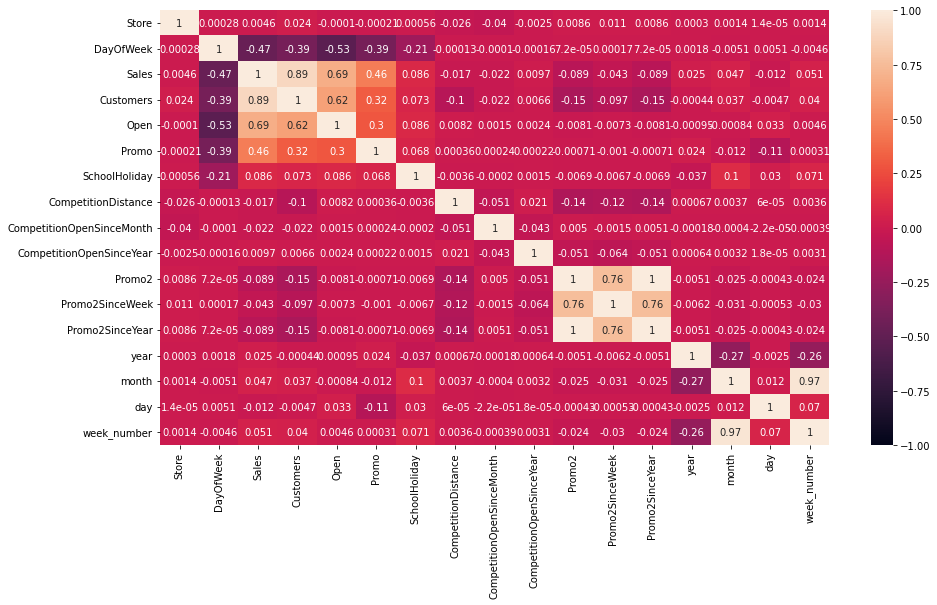

In [55]:
# Setting the plot size
f, ax = plt.subplots(figsize=(15,8))

# Creating a heat map of 'store' to find correlation 
sns.heatmap(store.corr(), vmin=-1, annot = True)


From the above heat map, we can see that sales has a high correlation with customers, day of the week, and whether the store is open and participating in promotional offer.

The features Promo2, Promo2SinceWeek and Promo2SinceYear are collinear. So, these features need to be rationalized.

In [ ]:
# Performing groupby on month to find the average sales per month
avgsales = store.groupby(['month'], as_index = False).agg({'Sales':'mean'})
avgsales

,month,Sales
0,1,5461.241685
1,2,5637.314812
2,3,5769.514250
3,4,5722.102436
4,5,5472.018965
5,6,5740.315256
6,7,6055.229356
7,8,5686.349667
8,9,5563.980674
9,10,5529.499732


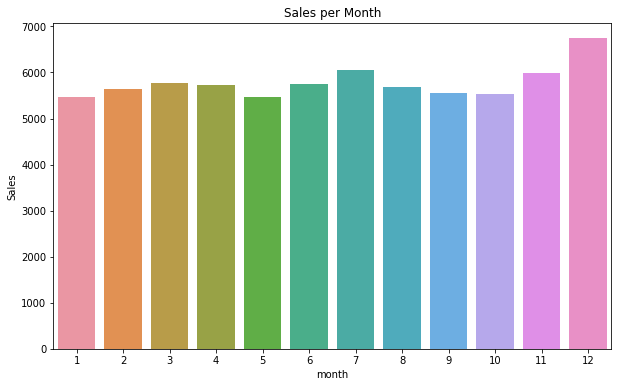

In [ ]:
# Barplot to show sales per month 
sns.barplot(x = "month" , y = "Sales" , data = avgsales)
plt.title('Sales per Month')
plt.rcParams['figure.figsize'] = (10, 6)

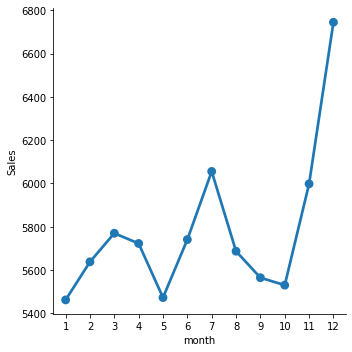

In [30]:
sns.factorplot(x = "month", y = "Sales" , data = store, kind = "point", ci = None)
plt.rcParams['figure.figsize'] = (10, 6)

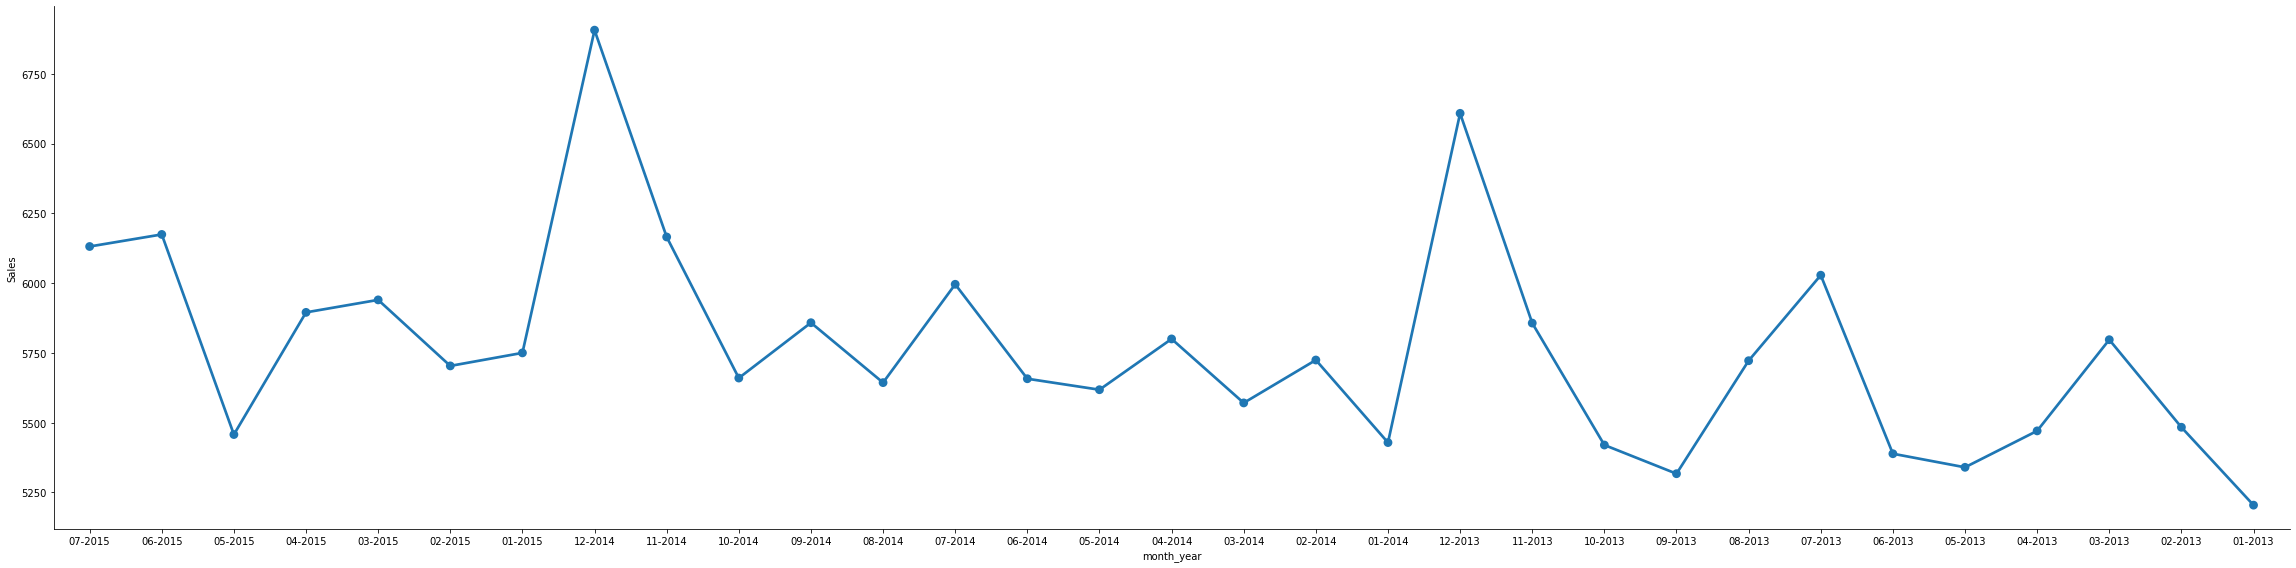

In [37]:
sns.factorplot(x = "month_year", y = "Sales" , data = store, kind = "point", aspect = 4, size = 8, ci = None)


In [ ]:
store2['StoreType'].value_counts().reset_index().rename(columns={'index':'Store Type','StoreType': 'Count'})

,Store Type,Count
0,a,602
1,d,348
2,c,148
3,b,17


Majority of the stores are of type A. Only 17 stores are of type B.

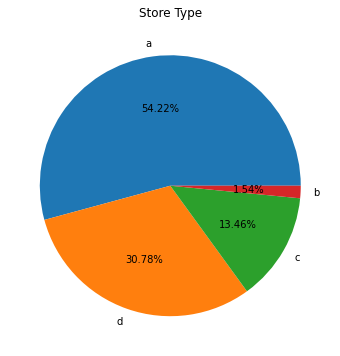

In [ ]:
# Plotting a Pie Chart to visualize the number of stores by type
plt.pie(store['StoreType'].value_counts(), labels = store['StoreType'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Store Type", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

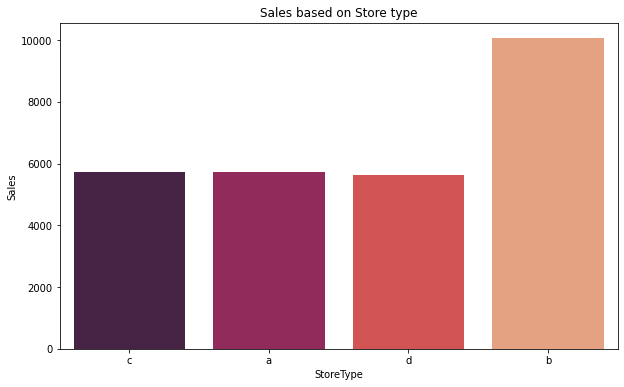

In [ ]:
# Barplot to check Sales according to Store type
sns.barplot(x ='StoreType', y ='Sales', data = store, palette= 'rocket', ci = None)
plt.title('Sales based on Store type')
plt.rcParams['figure.figsize'] = (10, 6)

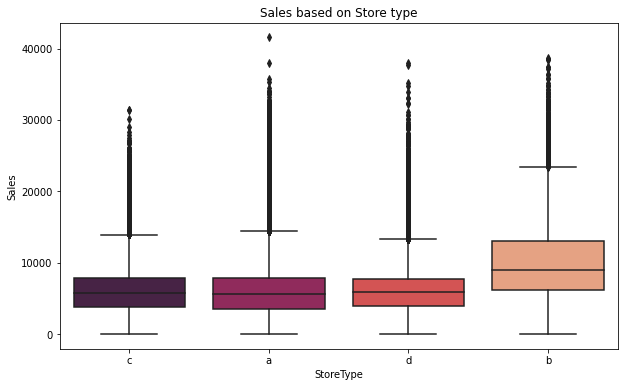

In [ ]:
# Boxplot to check Sales according to Store type
sns.boxplot(x ='StoreType', y ='Sales', data = store, palette= 'rocket')
plt.title('Sales based on Store type')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

The sales in store type B surpasses that of the other store types.

In [ ]:
# Grouping Assortment by Store type
store2.groupby(['StoreType'])['Assortment'].value_counts().unstack()

Assortment,a,b,c
StoreType,,,
a,381.0,NaN,221.0
b,7.0,9.0,1.0
c,77.0,NaN,71.0
d,128.0,NaN,220.0


In [ ]:
store2.groupby(['StoreType'])['Assortment'].value_counts(normalize = True).unstack()

Assortment,a,b,c
StoreType,,,
a,0.632890,NaN,0.367110
b,0.411765,0.529412,0.058824
c,0.520270,NaN,0.479730
d,0.367816,NaN,0.632184


Store type A has a major share of basic assortment products while store type D has a major share of extended assortment. Stores of type C have a nearly equal share of basic and extended assortments.

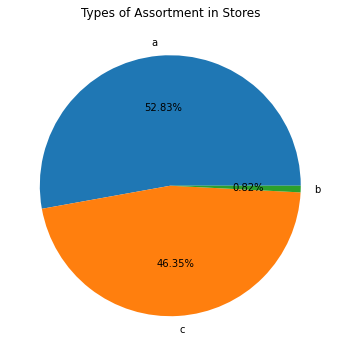

In [ ]:
# Plotting a Pie Chart to visualize the number of stores by assortment
plt.pie(store['Assortment'].value_counts(), labels = store['Assortment'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Types of Assortment in Stores", fontsize = 12)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

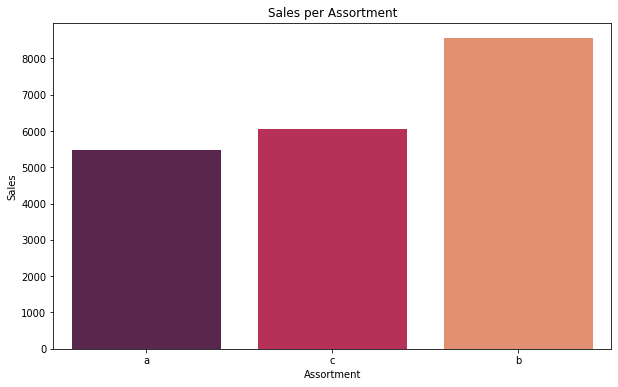

In [ ]:
# Barplot to check Sales according to Assortments
sns.barplot(x ='Assortment', y ='Sales', data = store, palette= 'rocket', ci = None)
plt.title('Sales per Assortment')
plt.rcParams['figure.figsize'] = (10, 6)

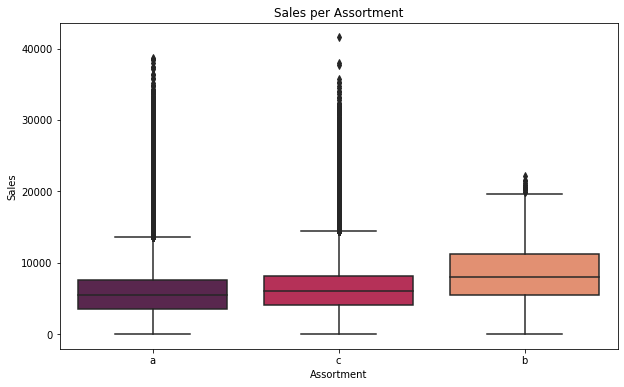

In [ ]:
# Boxplot to check Sales according to Assortments
sns.boxplot(x ='Assortment', y ='Sales', data = store, palette= 'rocket')
plt.title('Sales per Assortment')
plt.rcParams['figure.figsize'] = (10, 6)

The average sales of stores with extra assortment is highest.

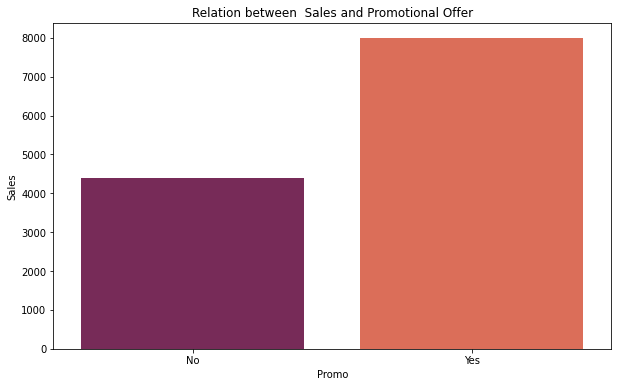

In [ ]:
# Barplot to check for the effect of Promo on Sales
sns.barplot(data = store, x = 'Promo', y = 'Sales', palette= 'rocket', ci = None)

# Giving a title to the plot
plt.title("Relation between  Sales and Promotional Offer")
plt.xticks([0,1], labels = ['No', 'Yes'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


The presence of promotional offer greatly affects sales. The average sales nearly doubles when there is a promo in the store.

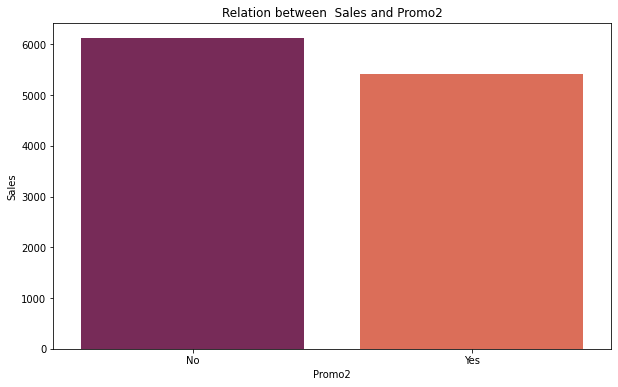

In [ ]:
# Barplot to check for the effect of Promo2 on Sales
sns.barplot(data = store, x = 'Promo2', y = 'Sales', palette= 'rocket', ci = None)

# Giving a title to the plot
plt.title("Relation between  Sales and Promo2")
plt.xticks([0,1], labels = ['No', 'Yes'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


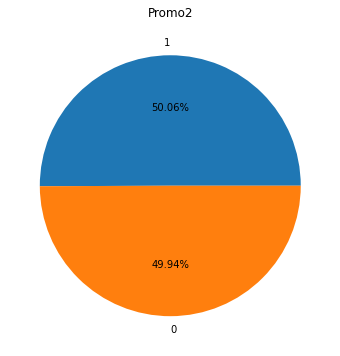

In [ ]:
# Plotting a Pie Chart to visualize the number of stores that are running Promo2
plt.pie(store['Promo2'].value_counts(), labels = store['Promo2'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Promo2")

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

Looks like Promo2 does not have much of an effect on sales

Let us check the sales based on the store type, presence of promotional offer and month.

In [ ]:
temp_df1 = store.groupby(['month','StoreType','Promo'])['Sales'].mean().reset_index()
temp_df1

,month,StoreType,Promo,Sales
0,1,a,0,4068.465082
1,1,a,1,7711.565413
2,1,b,0,8281.111562
3,1,b,1,10370.114286
4,1,c,0,4227.936393
...,...,...,...,...
91,12,b,1,13593.297872
92,12,c,0,5341.134245
93,12,c,1,10662.879035
94,12,d,0,4971.875407


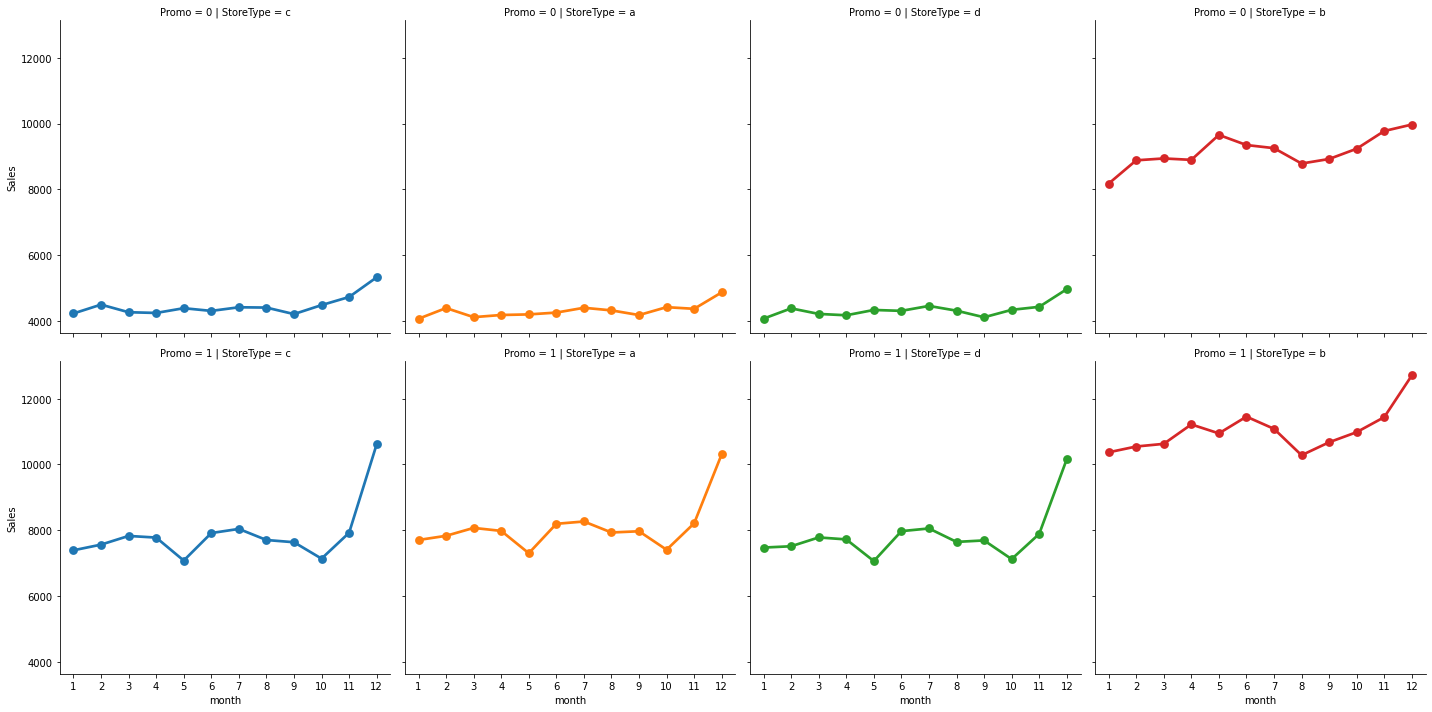

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo', col ='StoreType', hue ='StoreType', ci = None)


The presence of the promo positively affects the sales in the stores.

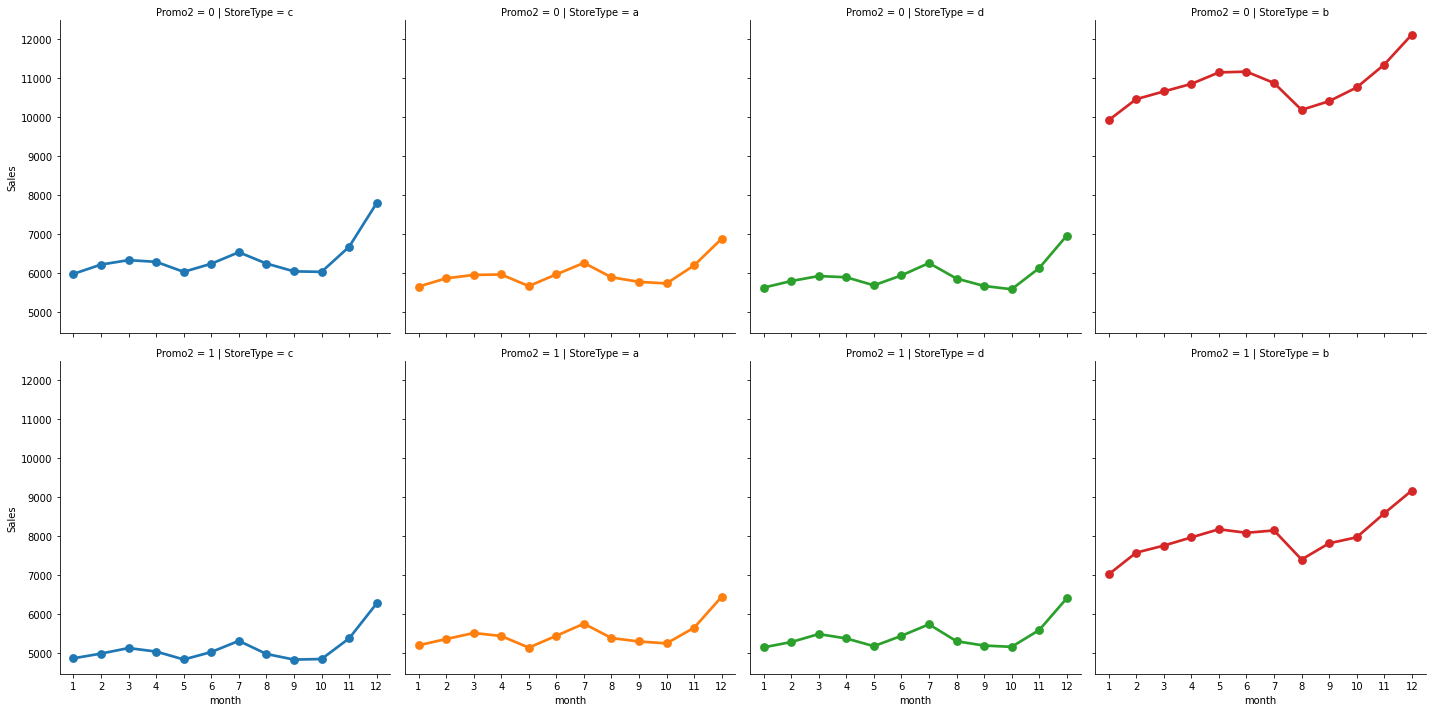

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo2', col ='StoreType', hue ='StoreType', ci = None)

Promo2 doesnot have a very positive relationship with sales.

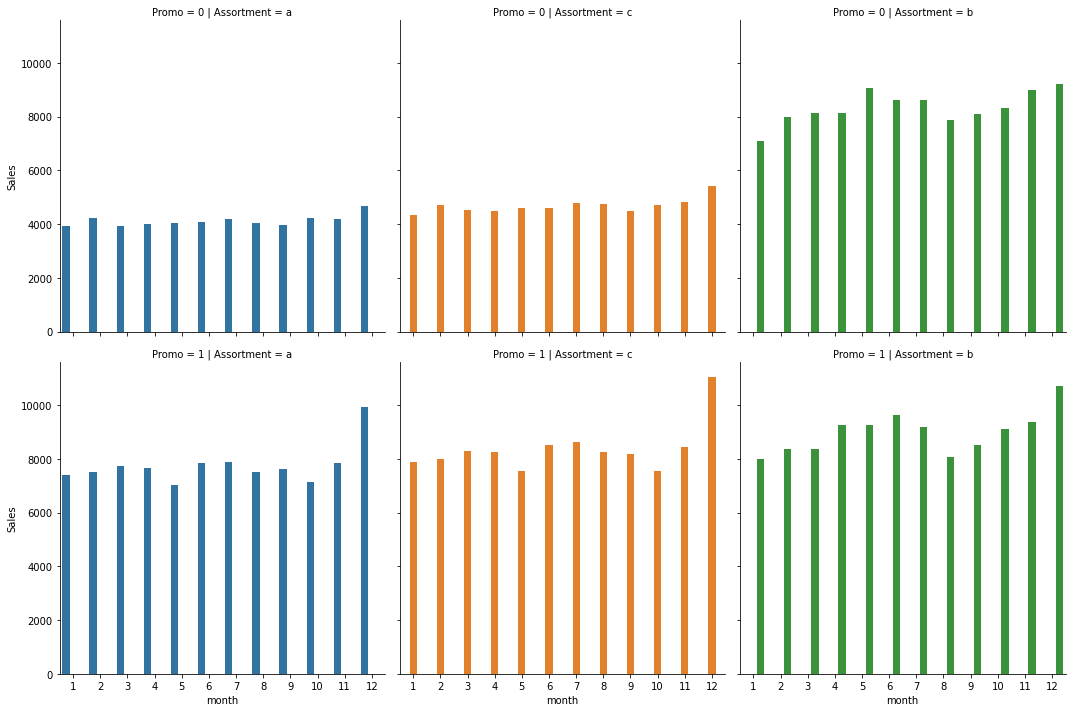

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo', col ='Assortment', hue ='Assortment', kind = 'bar', ci = None)

The presence of promotional offer seems to have a lot of impact on sales if we differentiate according to assortment

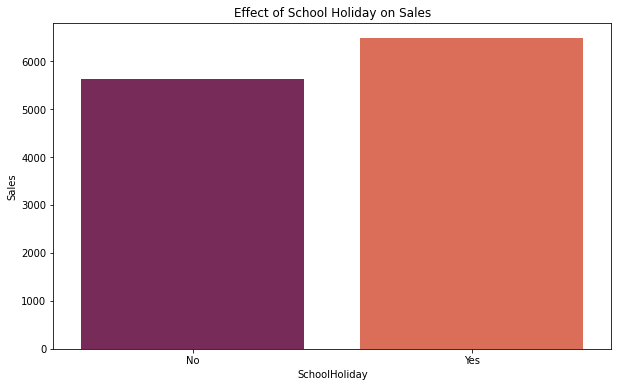

In [ ]:
# Bar plot to check if there is any effect of school holidays on sales
sns.barplot(x ='SchoolHoliday', y ='Sales', data = store, palette ='rocket', ci = None)
plt.title('Effect of School Holiday on Sales')
plt.xticks([0,1],labels = ['No','Yes'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

There is a small increase in average sales when there is a School holiday.

In [ ]:
# Checking for unique values in StateHoliday
store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [56]:
# Mapping the value of '0' to state holidays 0. This is done to remove differentiation between 0 and '0'

store['StateHoliday'] = ['0' if i == 0 else i for i in store['StateHoliday']]


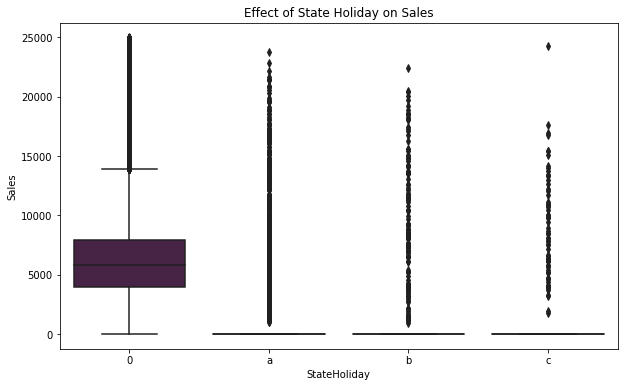

In [ ]:
sns.boxplot(x ='StateHoliday', y ='Sales', data = store, palette = 'rocket')
plt.title('Effect of State Holiday on Sales')
plt.rcParams['figure.figsize'] = (10, 6)

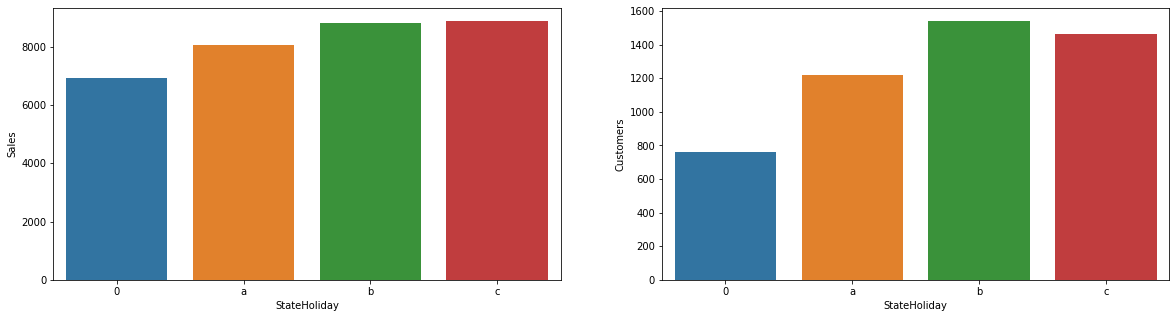

In [ ]:
# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='StateHoliday', y ='Sales', data = store[store['Open'] != 0], ax = ax1, ci = None)
sns.barplot(x ='StateHoliday', y ='Customers', data = store[store['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()


If the store is open, then there are higher number on sales on Christmas and Easter.
There is a two fold increase in the number of customers on christmas and easter when compared to a normal day.

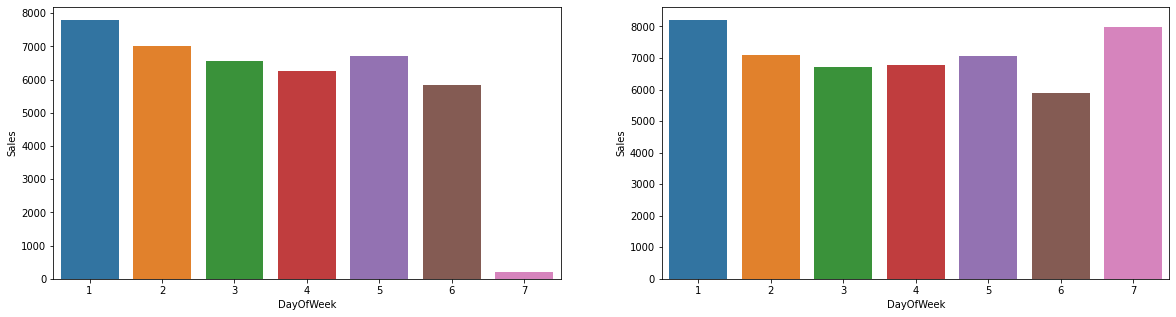

In [ ]:
# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='DayOfWeek', y ='Sales', data = store, ax = ax1, ci =None)
sns.barplot(x ='DayOfWeek', y ='Sales', data = store[ store['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()

Next, I create a new column 'CompetitionOpen' to calculate the number of months since the nearest competitor store has opened

In [57]:
# Creating a column  'CompetitionOpen' and assigning the value of 0 to all the observations
store['CompetitionOpen'] = 0

# For all the non-zero observations of 'CompetitionOpenSinceYear', 'CompetitionOpen' takes the value of the total period for which the competitor existed
store['CompetitionOpen'] = store['CompetitionOpen'].where(store['CompetitionOpenSinceYear'] == 0, 
                                                          other =(12 * (store['year'] - store['CompetitionOpenSinceYear']) + 
                                                                  (store['month'] - store['CompetitionOpenSinceMonth'])))

# All the negative values of CompetitionOpen are set to 0
store['CompetitionOpen'] = store['CompetitionOpen'].where(store['CompetitionOpen'] > 0, other = 0)


Similarly, I create a new column 'Promo2open' to calculate the number of 
months since the time the store has begun participating in Promo2.

In [58]:
# Creating a column  'Promo2open' and assigning the value of 0 to all the observations
store['Promo2open'] = 0

# For all the non-zero observations of 'Promo2SinceYear', 'Promo2open' takes the value of the total period for which the store has been running Promo2
store['Promo2open'] = store['Promo2open'].where(store['Promo2SinceYear'] == 0, 
                                                other = (12 * (store['year'] - store['Promo2SinceYear']) + 
                                                         (store['week_number'] - store['Promo2SinceWeek'])/4))

# All the negative values of Promo2open are set to 0
store['Promo2open'] = store['Promo2open'].where(store['Promo2open'] > 0, other = 0)


In [ ]:
store['PromoInterval'].unique()

array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [59]:
store.shape

(1016396, 25)

In [60]:
store.tail(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,month_year,week_number,CompetitionOpen,Promo2open
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,01-2013,1,29,6.75
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,01-2013,1,29,6.75


In [61]:
store.drop(columns = ['Date','Customers','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek',
                   'Promo2SinceYear','year','month_year','week_number'], inplace = True)	

In [62]:
store.shape

(1016396, 16)

In [63]:
store.head(2)

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,month,day,CompetitionOpen,Promo2open
0,1,5,5263,1,1,0,1,c,a,1270.0,0,0,7,31,82,0.0
1,1,4,5020,1,1,0,1,c,a,1270.0,0,0,7,30,82,0.0


Next, We need to encode 'StateHoliday', 'StoreType', 'Assortment' and 'PromoInterval' as they are of object data type.

In [64]:
label_encoder = LabelEncoder()

# Defining a function to label encode the features
def encoding(col):
  store[col] = label_encoder.fit_transform(store[col])


In [65]:
encoding('StoreType')
encoding('Assortment')
encoding('PromoInterval')
encoding('StateHoliday')


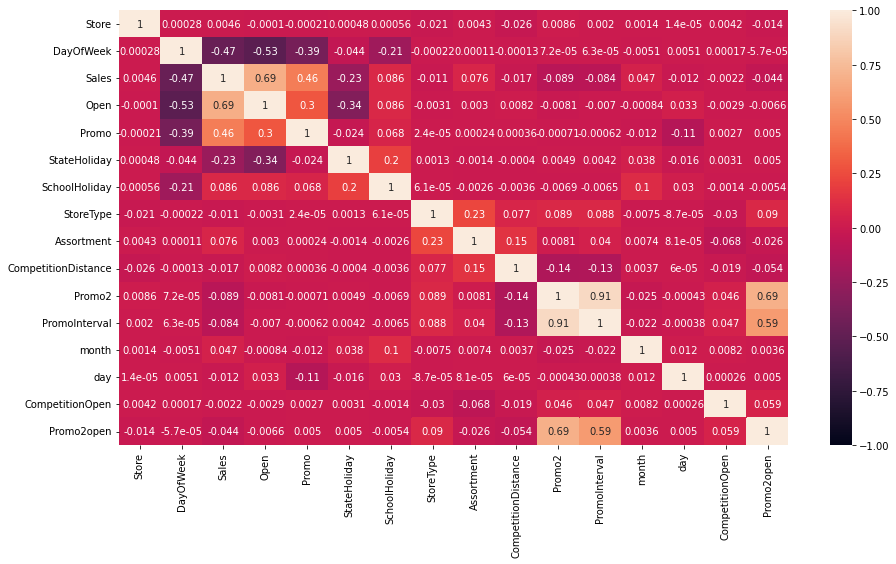

In [66]:
# Setting the plot size
f, ax = plt.subplots(figsize=(15,8))

# Creating a heat map of 'store' to find correlation 
sns.heatmap(store.corr(), vmin=-1, annot = True)

In [ ]:
store['Promo2'].value_counts()

1    509036
0    507360
Name: Promo2, dtype: int64

In [ ]:
store[store['PromoInterval'] == 0].shape

(507360, 16)

'PromoInterval' contains the information (whether the store runs promo2 or not) provided by 'Promo2'. So, Promo2 can be dropped.

In [ ]:
store.head(2)

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,month,day,CompetitionOpen,Promo2open
0,1,5,5263,1,1,0,1,2,0,1270.0,0,0,7,31,82,0.0
1,1,4,5020,1,1,0,1,2,0,1270.0,0,0,7,30,82,0.0


<b> Transformation 

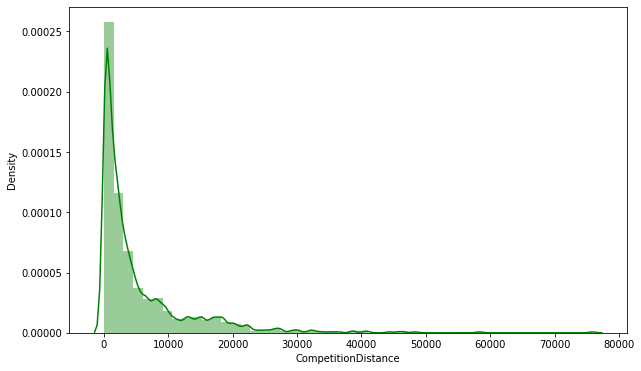

In [ ]:
sns.distplot(store['CompetitionDistance'], color = 'g')
plt.rcParams['figure.figsize'] = (10, 6)

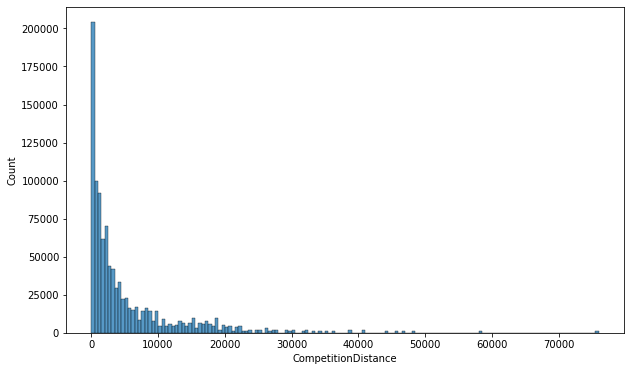

In [ ]:

sns.histplot(data = store, x = 'CompetitionDistance', binwidth = 500)
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
store['CompetitionDistance'].describe()

count    1.017002e+06
mean     5.422779e+03
std      7.707290e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [67]:
store['ln_CompetitionDistance'] = store['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)

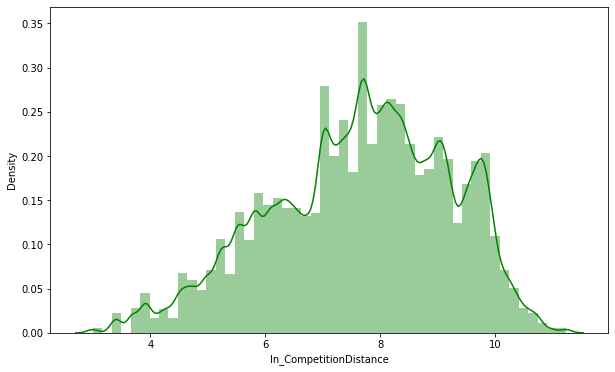

In [ ]:
sns.distplot(store['ln_CompetitionDistance'], color = 'g')
plt.rcParams['figure.figsize'] = (10, 6)

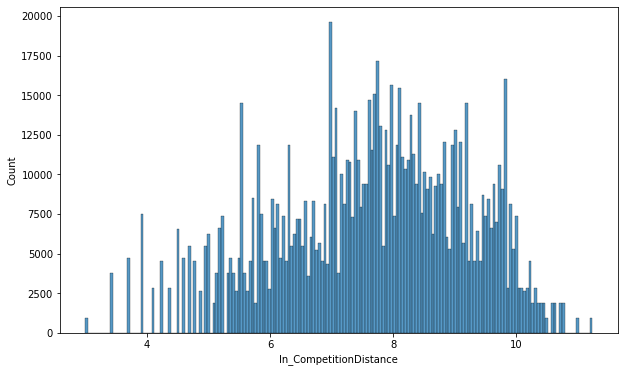

In [ ]:
sns.histplot(data = store, x = 'ln_CompetitionDistance')
plt.rcParams['figure.figsize'] = (10, 6)

In [68]:
store['ln_Sales'] = store['Sales'].map(lambda x : np.log(x) if x != 0 else 0)


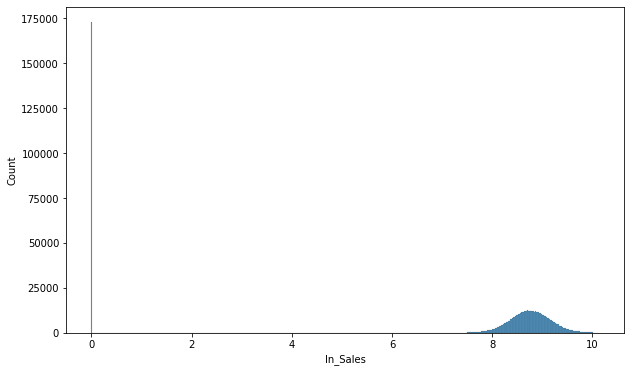

In [ ]:

sns.histplot(data = store, x = 'ln_Sales')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
store.tail(2)

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,month,day,CompetitionOpen,Promo2open,IsPromo2Month,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,ln_CompetitionDistance,ln_Sales
1017207,1115,3,3697,1,0,0,1,5350.0,1,1,2,29,6.75,0,0,0,0,1,0,0,1,8.584852,8.215277
1017208,1115,2,0,0,0,1,1,5350.0,1,1,1,29,6.75,0,0,0,0,1,0,0,1,8.584852,0.000000


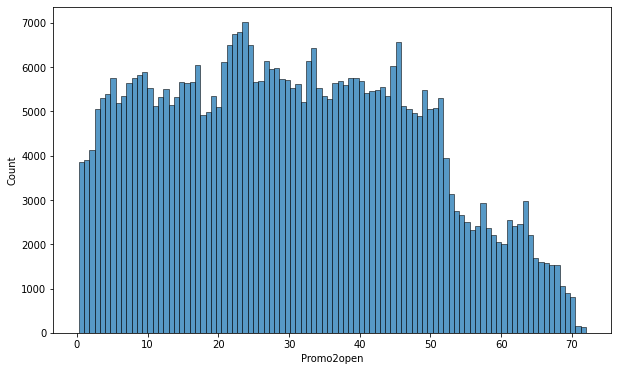

In [ ]:
sns.histplot(data = store[ store['Promo2open'] > 0], x = 'Promo2open')
plt.rcParams['figure.figsize'] = (10, 6)

In [69]:
store['ln_Promo2open'] = store['Promo2open'].map(lambda x : np.log(x) if x != 0 else 0)

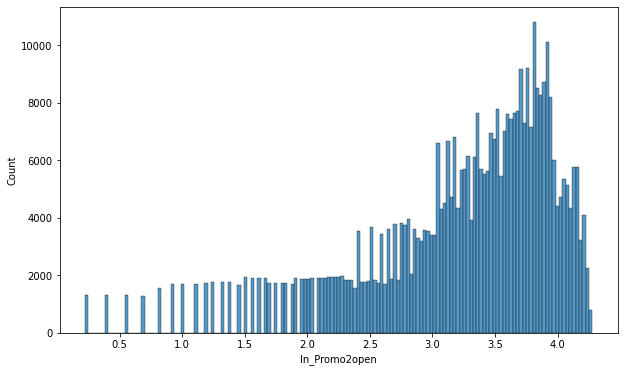

In [ ]:
sns.histplot( data = store[ store['ln_Promo2open'] > 0], x = 'ln_Promo2open')
plt.rcParams['figure.figsize'] = (10, 6)

In [70]:
store['sqrt_Promo2open'] = store['Promo2open'].map(lambda x : np.sqrt(x) if x != 0 else 0)

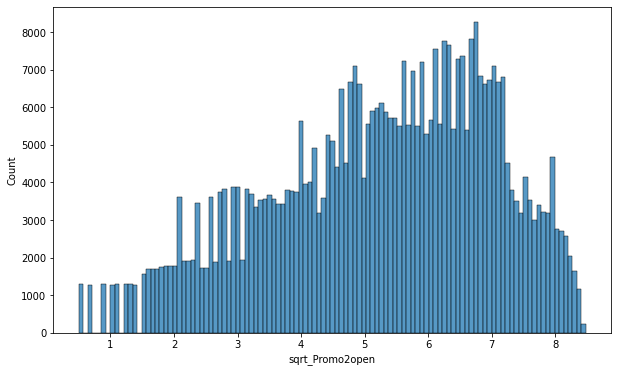

In [ ]:
sns.histplot( data = store[ store['sqrt_Promo2open'] > 0], x = 'sqrt_Promo2open')
plt.rcParams['figure.figsize'] = (10, 6)

Square root transformation works better than log transformation in making the data relatively more normalized.

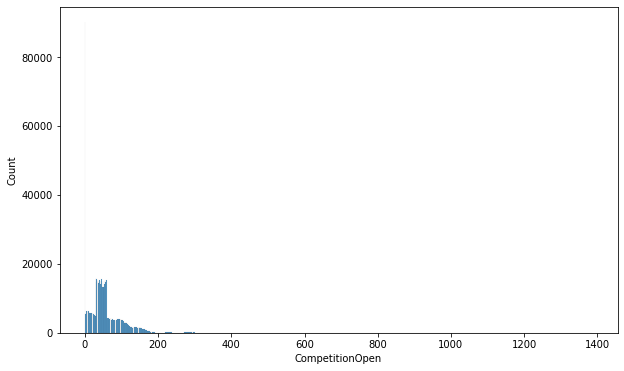

In [ ]:
sns.histplot( data = store, x = 'CompetitionOpen')
plt.rcParams['figure.figsize'] = (10, 6)

In [71]:
store['ln_CompetitionOpen'] = store['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)

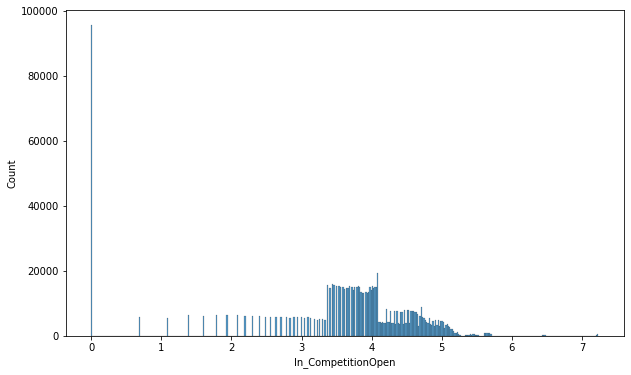

In [ ]:
sns.histplot( data = store, x = 'ln_CompetitionOpen')
plt.rcParams['figure.figsize'] = (10, 6)

In [72]:
store.drop(columns=['Sales','Store','CompetitionDistance','Promo2','Promo2open','CompetitionOpen','ln_Promo2open'], inplace = True)

In [73]:
store.shape

(1016396, 14)

In [74]:
store.tail(2)

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoInterval,month,day,ln_CompetitionDistance,ln_Sales,sqrt_Promo2open,ln_CompetitionOpen
1017207,3,1,0,0,1,3,2,3,1,2,8.584852,8.215277,2.598076,3.367296
1017208,2,0,0,1,1,3,2,3,1,1,8.584852,0.000000,2.598076,3.367296


Sales is possible only if the store is open. So for training the model, i will be considering all those observations in which the store is open.

In [75]:
store = store[ store['Open'] == 1]


In [76]:
store.drop(['Open'], axis = 1, inplace = True)

In [77]:
store.shape

(843579, 13)

In [78]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843579 entries, 0 to 1017207
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DayOfWeek               843579 non-null  int64  
 1   Promo                   843579 non-null  int64  
 2   StateHoliday            843579 non-null  int64  
 3   SchoolHoliday           843579 non-null  int64  
 4   StoreType               843579 non-null  int64  
 5   Assortment              843579 non-null  int64  
 6   PromoInterval           843579 non-null  int64  
 7   month                   843579 non-null  int64  
 8   day                     843579 non-null  int64  
 9   ln_CompetitionDistance  843579 non-null  float64
 10  ln_Sales                843579 non-null  float64
 11  sqrt_Promo2open         843579 non-null  float64
 12  ln_CompetitionOpen      843579 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 90.1 MB


In [79]:
store.head(3)

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,PromoInterval,month,day,ln_CompetitionDistance,ln_Sales,sqrt_Promo2open,ln_CompetitionOpen
0,5,1,0,1,2,0,0,7,31,7.146772,8.568456,0.0,4.406719
1,4,1,0,1,2,0,0,7,30,7.146772,8.521185,0.0,4.406719
2,3,1,0,1,2,0,0,7,29,7.146772,8.472614,0.0,4.406719


In [80]:
X = store.drop(['ln_Sales'], axis = 1)
y = store['ln_Sales'].values

In [81]:
X.shape, y.shape

((843579, 12), (843579,))

In [82]:
# split the data set into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [83]:
X_train.shape, X_test.shape

((674863, 12), (168716, 12))

In [84]:
# Transforming data through the StandardScaler

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b> Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [ ]:
print(lr.intercept_, end = '\n\n')
print(lr.coef_)

8.756184445832224

[-0.03489121  0.16119046  0.00273068  0.00575427  0.01069188  0.0593407
 -0.05792071  0.02655808 -0.00470116 -0.04335654  0.00706394 -0.0107818 ]


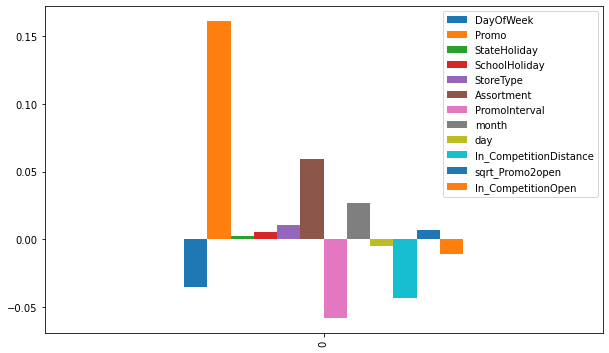

In [ ]:
coeff = lr.coef_.reshape(1,-1)
df = pd.DataFrame(coeff, columns = list(X.columns))
df.plot.bar(figsize=(10,6))

In [85]:
# Defining a function to find the R squared, adjusted R squared, MSE and RMSE of the models

def metrics(train_pred, test_pred, model):

  print(f'The metrics for model prediction using {model} are:', end = '\n\n')
  print('R_squared = ', r2(np.exp(y_test), np.exp(test_pred)), end = '\n\n')
  print('R_squared for training data set = ', r2(np.exp(y_train), np.exp(train_pred)), end = '\n\n')
  print("Adjusted R_squared = ",1-(1-r2(np.exp(y_test), np.exp(test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), end = '\n\n')
  print('MSE = ', mse(np.exp(y_test), np.exp(test_pred)), end = '\n\n')
  print('RMSE = ', math.sqrt(mse(np.exp(y_test), np.exp(test_pred))), end = '\n\n')
  print('RMSE for training data set = ', math.sqrt(mse(np.exp(y_train), np.exp(train_pred))), end = '\n\n')
  print('RMSPE = ', np.sqrt(np.mean(np.square((np.exp(y_test) - np.exp(test_pred)) / np.exp(y_test)))) * 100)



In [ ]:
metrics(y_pred_train, y_pred, 'Linear Regression')

The metrics for model prediction using Linear Regression are:

R_squared =  0.1671703766475967

R_squared for training data set =  0.1701282252953954

Adjusted R_squared =  0.1671111367082938

MSE =  7658543.775923778

RMSE =  2767.407410542181

RMSE for training data set =  2769.945463536684

RMSPE =  44.55685217322802


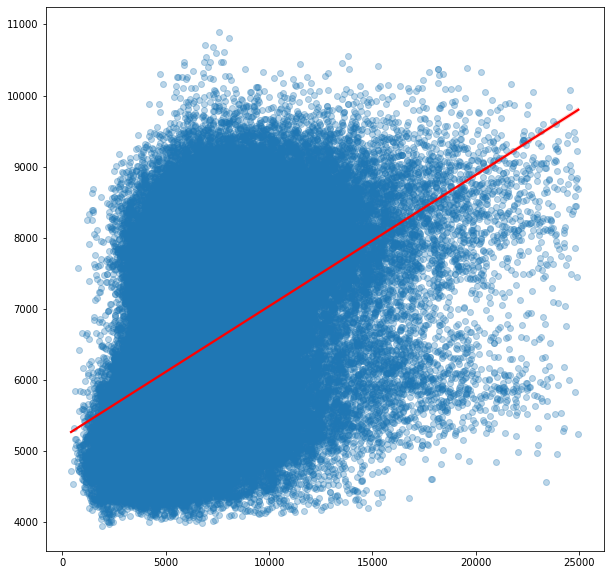

In [ ]:
plt.figure(figsize=(10,10))

# Drawing a regression plot for the test data prediction
sns.regplot(x = np.exp(y_test), y = np.exp(y_pred), line_kws = {"color": "red"}, scatter_kws = {'alpha':0.3})

<b> Lasso Regression

In [ ]:
lasso  = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [ ]:
# Predicting the y values with the trained lasso model
y_pred_l = lasso.predict(X_test)
y_pred_train_l = lasso.predict(X_train)

In [ ]:
print(lasso.intercept_)
print(lasso.coef_)

8.756184445832224
[-0.          0.07178405  0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.         -0.        ]


In [ ]:
metrics(y_pred_train_l, y_pred_l, 'Lasso Regression')

The metrics for model prediction using Lasso Regression are:

R_squared =  0.05430871105318669

R_squared for training data set =  0.055068071962219634

Adjusted R_squared =  0.05424144315950752

MSE =  8696398.31704727

RMSE =  2948.965635107888

RMSE for training data set =  2955.738328518855

RMSPE =  49.53371479291169


In [ ]:
# Cross validation and hyperparameter tuning

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,20,40,50,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 20, 40, 50, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train_lasso = lasso_regressor.predict(X_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, ", the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15} , the negative mean squared error is:  -0.1404910609501347


In [ ]:
metrics(y_pred_train_lasso, y_pred_lasso, 'Lasso Regression with hyperparameter tuning')

The metrics for model prediction using Lasso Regression with hyperparameter tuning are:

R_squared =  0.16717037664759637

R_squared for training data set =  0.17012822529539495

Adjusted R_squared =  0.16711113670829347

MSE =  7658543.775923781

RMSE =  2767.4074105421814

RMSE for training data set =  2769.9454635366847

RMSPE =  44.556852173228066


<b> Ridge Regression

In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)


Ridge(alpha=0.001)

In [ ]:
y_pred_r = ridge.predict(X_test)
y_pred_train_r = ridge.predict(X_train)

In [ ]:
print(ridge.intercept_, end = '\n\n')
print(ridge.coef_)


8.756184445832224

[-0.03489121  0.16119046  0.00273068  0.00575427  0.01069188  0.0593407
 -0.05792071  0.02655808 -0.00470116 -0.04335654  0.00706394 -0.0107818 ]


In [ ]:
metrics(y_pred_train_r, y_pred_r, 'Ridge Regression')

The metrics for model prediction using Ridge Regression are:

R_squared =  0.16717037659593215

R_squared for training data set =  0.17012822523547466

Adjusted R_squared =  0.16711113665662558

MSE =  7658543.776398875

RMSE =  2767.4074106280186

RMSE for training data set =  2769.945463636686

RMSPE =  44.55685217599649


In [ ]:
# Hyperprarameter tuning

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,10,20,40,50,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   10, 20, 40, 50, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_train_ridge = ridge_regressor.predict(X_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, ", the negative mean squared error is: ", ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 40}

Using  {'alpha': 40} , the negative mean squared error is:  -0.14049106067397646


In [ ]:
metrics(y_pred_train_ridge, y_pred_ridge, 'Ridge Regression with hyperparameter tuning')

The metrics for model prediction using Ridge Regression with hyperparameter tuning are:

R_squared =  0.16716830949305017

R_squared for training data set =  0.1701258279329002

Adjusted R_squared =  0.16710906940670867

MSE =  7658562.785086207

RMSE =  2767.410845011309

RMSE for training data set =  2769.949464491274

RMSPE =  44.55696293107552


<b> Elatic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred_en = elasticnet.predict(X_test)
y_pred_train_en = elasticnet.predict(X_train)

In [ ]:
metrics(y_pred_train_en, y_pred_en, 'Elastic Net Regression')

The metrics for model prediction using Elastic Net Regression are:

R_squared =  0.0913360158764418

R_squared for training data set =  0.0925173937439957

Adjusted R_squared =  0.09127138176910832

MSE =  8355902.221637151

RMSE =  2890.657748962535

RMSE for training data set =  2896.5756563237887

RMSPE =  47.77902945506111


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-10,1e-5,1e-3,1e-1,1,5,10,20,40,60,100,200],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring ='neg_mean_squared_error', cv = 3)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 1, 5, 10,
                                   20, 40, 60, 100, 200],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)
y_pred_train_elastic = elastic_regressor.predict(X_train)

In [ ]:
print("The best fit alpha and l1 ratio is found out to be :" , elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, ", the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha and l1 ratio is found out to be : {'alpha': 1e-10, 'l1_ratio': 0.4}

Using  {'alpha': 1e-10, 'l1_ratio': 0.4} , the negative mean squared error is:  -0.14048946864046374


In [ ]:
metrics(y_pred_train_elastic, y_pred_elastic, 'Elastic Net Regression with hyperparameter tuning')

The metrics for model prediction using Elastic Net Regression with hyperparameter tuning are:

R_squared =  0.16717037662826728

R_squared for training data set =  0.17012822527132554

Adjusted R_squared =  0.16711113668896294

MSE =  7658543.776101528

RMSE =  2767.4074105742957

RMSE for training data set =  2769.9454635768543

RMSPE =  44.55685217456969


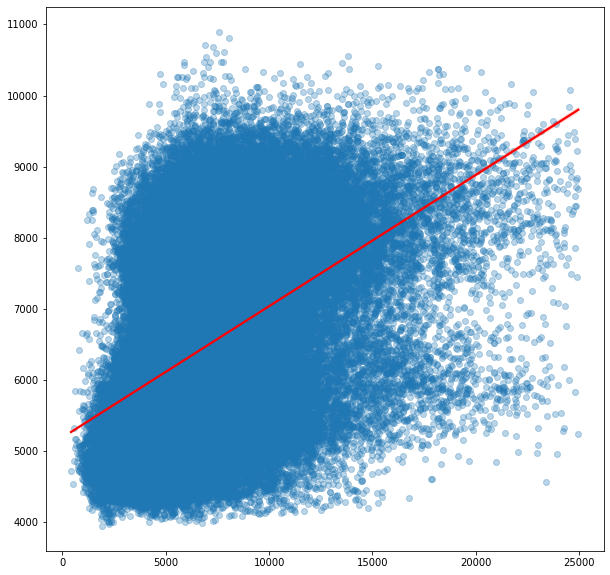

In [ ]:
plt.figure(figsize=(10,10))

# Drawing a regression plot for the test data prediction
sns.regplot(x = np.exp(y_test), y = np.exp(y_pred_elastic), line_kws = {"color": "red"}, scatter_kws = {'alpha':0.3})

<b> Decision Trees

In [ ]:
decision_model = DecisionTreeRegressor()
decision_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [ ]:

y_pred_dt = decision_model.predict(X_test)

y_pred_train_dt = decision_model.predict(X_train)

In [ ]:
metrics(y_pred_train_dt, y_pred_dt, 'Decision Tree')

The metrics for model prediction using Decision Tree are:

R_squared =  0.8098855086218395

R_squared for training data set =  0.9982173044549782

Adjusted R_squared =  0.809871985602708

MSE =  1748256.92294213

RMSE =  1322.216670195218

RMSE for training data set =  128.38205147218088

RMSPE =  20.21880295254459


We can see that the model prediction in case of the training data set is very good, but that of the test data pales in comparison. This is a clear case of overfitting of the model.

So, let us pre-prune the tree.

In [ ]:
d_tree = DecisionTreeRegressor(max_depth = 20)
d_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [ ]:
y_pred_dt = d_tree.predict(X_test)
y_pred_train_dt = d_tree.predict(X_train)

metrics(y_pred_train_dt, y_pred_dt, 'Decision Tree')

The metrics for model prediction using Decision Tree are:

R_squared =  0.7744458360922093

R_squared for training data set =  0.863469762534207

Adjusted R_squared =  0.7744297922164816

MSE =  2074153.4519104913

RMSE =  1440.192157981181

RMSE for training data set =  1123.5182837952011

RMSPE =  21.42021971760359


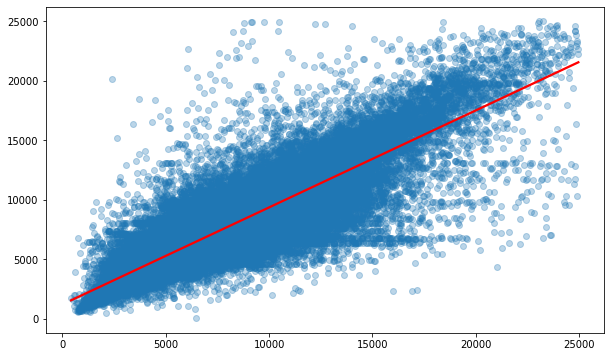

In [ ]:
plt.figure(figsize=(10,6))

# Drawing a regression plot for the test data prediction
sns.regplot(x = np.exp(y_test), y = np.exp(y_pred_dt), line_kws = {"color": "red"}, scatter_kws = {'alpha':0.3})

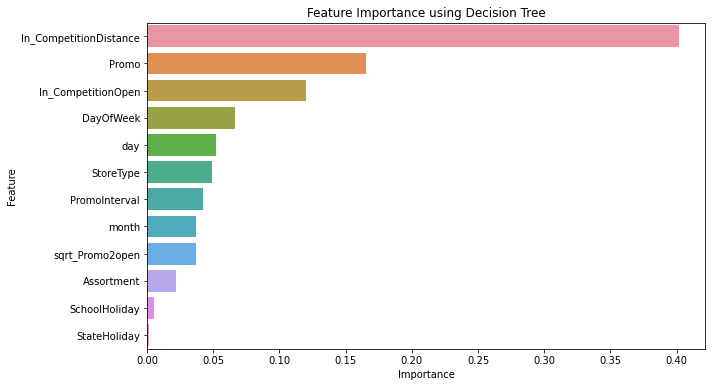

In [ ]:
importance_dt = pd.DataFrame({'Feature': X.columns, 
                              'Importance': decision_model.feature_importances_}
                             ).sort_values('Importance', ascending = False)
sns.barplot(data = importance_dt, x ='Importance', y ='Feature')
plt.title('Feature Importance using Decision Tree')
plt.rcParams['figure.figsize'] = (10, 6)

<b> Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 20)

rf.fit(X_train,y_train)


RandomForestRegressor(max_depth=20)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

In [ ]:
metrics(y_pred_train_rf, y_pred_rf, 'Random Forest')

The metrics for model prediction using Random Forest are:

R_squared =  0.8243720351352828

R_squared for training data set =  0.8786911436334903

Adjusted R_squared =  0.8243595425561444

MSE =  1615041.5636977092

RMSE =  1270.8428556268116

RMSE for training data set =  1059.0390540406904

RMSPE =  18.49793589785944


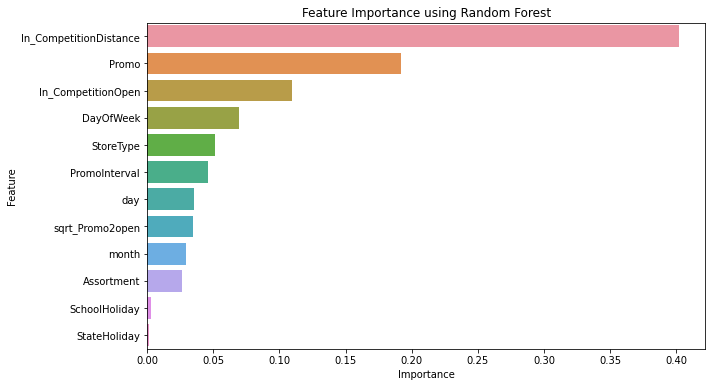

In [ ]:
importance_rf = pd.DataFrame({'Feature': X.columns, 
                              'Importance': rf.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_rf, x ='Importance', y ='Feature')
plt.title('Feature Importance using Random Forest')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Hyperparameter tuning

rf_tuned = RandomForestRegressor() 
grid_values = {'n_estimators':[150,200], 'max_depth':[20,25], 'n_jobs':[4]} # n_estimators is no of trees you want to build
rf_tuned = GridSearchCV(rf_tuned, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the object to train dataset
rf_tuned.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 25], 'n_estimators': [150, 200],
                         'n_jobs': [4]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit parameters are found out to be :" , rf_tuned.best_params_)
print("\nUsing ",rf_tuned.best_params_, ", the negative mean squared error is: ", rf_tuned.best_score_)

The best fit parameters are found out to be : {'max_depth': 25, 'n_estimators': 200, 'n_jobs': 4}

Using  {'max_depth': 25, 'n_estimators': 200, 'n_jobs': 4} , the negative mean squared error is:  -0.021630055805617193


In [ ]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_pred_train_rf_tuned = rf_tuned.predict(X_train)

In [ ]:
metrics(y_pred_train_rf_tuned, y_pred_rf_tuned, 'Random Forest with hyperparameter tuning')

The metrics for model prediction using Random Forest with hyperparameter tuning are:

R_squared =  0.8759149718634408

R_squared for training data set =  0.9531812724420191

Adjusted R_squared =  0.8759061455809346

MSE =  1141062.4613654718

RMSE =  1068.2052524517335

RMSE for training data set =  657.9236904550891

RMSPE =  15.71254131340331


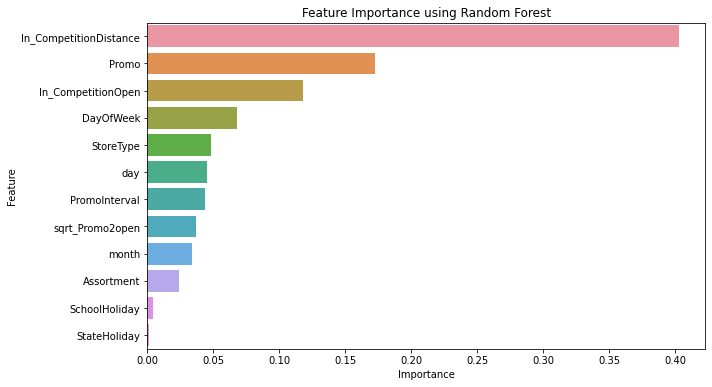

In [ ]:
importance_rf_tuned = pd.DataFrame({'Feature': X.columns, 
                              'Importance': rf_tuned.best_estimator_.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_rf_tuned, x ='Importance', y ='Feature')
plt.title('Feature Importance using Random Forest')  
plt.rcParams['figure.figsize'] = (10, 6)

<b> XG Boost

In [35]:
xgb_model = XGBRegressor(max_depth = 20, n_jobs = -1, n_estimators = 100, random_state = 27)
xgb_model.fit(X_train,y_train)

[04:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=20, n_jobs=-1, random_state=27)

In [36]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_train)

In [39]:
metrics(y_pred_train_xgb, y_pred_xgb, 'XG Boost')

The metrics for model prediction using XG Boost are:

R_squared =  0.9139968163434408

R_squared for training data set =  0.974169693965864

Adjusted R_squared =  0.9139906988576588

MSE =  790869.0186250332

RMSE =  889.3081685361004

RMSE for training data set =  488.6866751446966

RMSPE =  13.45803658456462


Text(0.5, 1.0, 'Feature Importance using XG Boost')

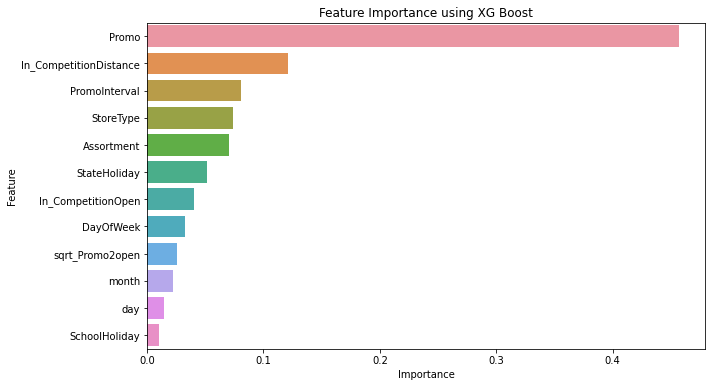

In [40]:
importance_xgb = pd.DataFrame({'Feature': X.columns, 
                              'Importance': xgb_model.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb, x ='Importance', y ='Feature')

plt.title('Feature Importance using XG Boost')

In [47]:
importance_xgb

,Feature,Importance
1,Promo,0.456482
9,ln_CompetitionDistance,0.121008
6,PromoInterval,0.080370
4,StoreType,0.074041
5,Assortment,0.070775
2,StateHoliday,0.051733
11,ln_CompetitionOpen,0.039937
0,DayOfWeek,0.032676
10,sqrt_Promo2open,0.025290
7,month,0.022260


In [42]:
xgb_tuned = XGBRegressor() 
params = {'n_estimators':[200,300], 'max_depth':[25,30], 'learning_rate':[0.2], 'subsample': [0.6], 'colsample_bytree':[0.8]} 
xgb_tuned = RandomizedSearchCV(xgb_tuned, param_distributions = params, n_jobs = -1, n_iter = 4,
                                random_state = 27, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the object to train dataset
xgb_tuned.fit(X_train, y_train)

[11:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=4, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8],
                                        'learning_rate': [0.2],
                                        'max_depth': [25, 30],
                                        'n_estimators': [200, 300],
                                        'subsample': [0.6]},
                   random_state=27, scoring='neg_mean_squared_error')

In [43]:
print("The best fit parameters are found out to be :" , xgb_tuned.best_params_)
print("\nUsing ",xgb_tuned.best_params_, ", the negative mean squared error is: ", xgb_tuned.best_score_)


The best fit parameters are found out to be : {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 25, 'learning_rate': 0.2, 'colsample_bytree': 0.8}

Using  {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 25, 'learning_rate': 0.2, 'colsample_bytree': 0.8} , the negative mean squared error is:  -0.016045236418522624


In [44]:
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
y_pred_train_xgb_tuned = xgb_tuned.predict(X_train)

In [45]:
metrics(y_pred_train_xgb_tuned, y_pred_xgb_tuned, 'XG Boost with hyperparameter tuning')

The metrics for model prediction using XG Boost with hyperparameter tuning are:

R_squared =  0.9246703209766177

R_squared for training data set =  0.9980373571104559

Adjusted R_squared =  0.9246649627070654

MSE =  692717.4877672965

RMSE =  832.2965143308583

RMSE for training data set =  134.70582132563246

RMSPE =  13.432194409017843


Text(0.5, 1.0, 'Feature Importance using XG Boost')

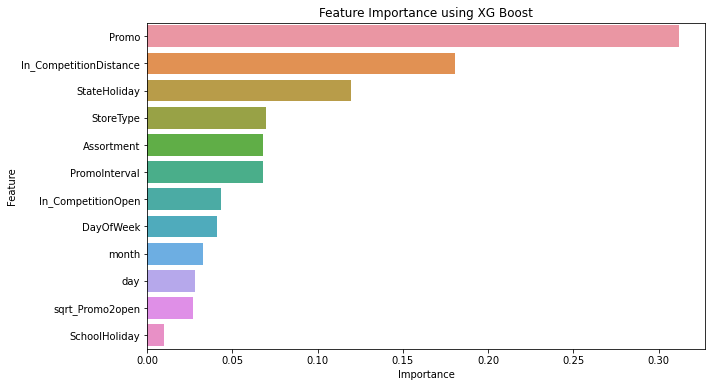

In [46]:
importance_xgb_tuned = pd.DataFrame({'Feature': X.columns, 
                              'Importance': xgb_tuned.best_estimator_.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb_tuned, x ='Importance', y ='Feature')

plt.title('Feature Importance using XG Boost')  


In [48]:
importance_xgb_tuned

,Feature,Importance
1,Promo,0.311665
9,ln_CompetitionDistance,0.180384
2,StateHoliday,0.119476
4,StoreType,0.069888
5,Assortment,0.068269
6,PromoInterval,0.068252
11,ln_CompetitionOpen,0.043542
0,DayOfWeek,0.040891
7,month,0.032775
8,day,0.027840


In [86]:
xgb2 = XGBRegressor(n_jobs = -1, random_state = 27, n_estimators = 1000, learning_rate = 0.2, 
                     max_depth = 15, subsample = 0.8, colsample_bytree = 0.7)

xgb2.fit(X_train,y_train)

[17:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=15,
             n_estimators=1000, n_jobs=-1, random_state=27, subsample=0.8)

In [87]:
y_pred_xgb2 = xgb2.predict(X_test)
y_pred_train_xgb2 = xgb2.predict(X_train)

In [88]:
metrics(y_pred_train_xgb2, y_pred_xgb2, 'XG Boost')

The metrics for model prediction using XG Boost are:

R_squared =  0.9336009487010879

R_squared for training data set =  0.9974160420664401

Adjusted R_squared =  0.9335962256753232

MSE =  610593.1234837361

RMSE =  781.4045837360669

RMSE for training data set =  154.56403300186517

RMSPE =  12.795617382652258


Text(0.5, 1.0, 'Feature Importance using XG Boost')

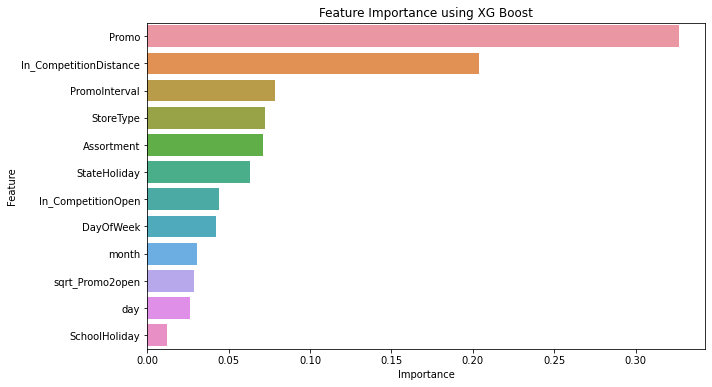

In [90]:
importance_xgb2 = pd.DataFrame({'Feature': X.columns, 
                              'Importance': xgb2.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb2, x ='Importance', y ='Feature')

plt.title('Feature Importance using XG Boost')  


<b> K Nearest Neighbors

In [49]:
knn = neighbors.KNeighborsRegressor()

params = {'n_neighbors':[2,3,5,8,10,12]}
knn_model = GridSearchCV( knn, param_grid = params, scoring = 'neg_mean_squared_error', cv = 3)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 5, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [50]:
print("The best fit parameters are found out to be :" , knn_model.best_params_)
print("\nUsing ",knn_model.best_params_, ", the negative mean squared error is: ", knn_model.best_score_)


The best fit parameters are found out to be : {'n_neighbors': 10}

Using  {'n_neighbors': 10} , the negative mean squared error is:  -0.09440910374286922


In [51]:
y_pred_knn = knn_model.predict(X_test)
y_pred_train_knn = knn_model.predict(X_train)

In [52]:
metrics(y_pred_train_knn, y_pred_knn, 'KNN with hyperparameter tuning')

The metrics for model prediction using KNN with hyperparameter tuning are:

R_squared =  0.4536070821602266

R_squared for training data set =  0.5453649109514287

Adjusted R_squared =  0.4535682167279932

MSE =  5024525.980819932

RMSE =  2241.5454447367183

RMSE for training data set =  2050.2045712381396

RMSPE =  33.752629331250716
